In [1]:
!pip install numpy
!pip install pandas
!pip install tensorflow
!pip install matplotlib
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 19.4 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110703 sha256=56589deb39d9fb7dc3bf069d4cce081ce48eb4f3aec4a4db0fa022477e159e40
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/43/4b/fb/736478af5e8004810081a06259f9aa2f7c3329fc5d03c2c412
Successfully built kaggle



### 1. Sign up for WatsonX

We will use WatsonX to run this notebook, WatsonX is available through IBM cloud.

* To start you must have IBM cloud account, Get your for free <a href="https://cloud.ibm.com/registration">Here.</a>   
* From the catalog create a <a href="https://cloud.ibm.com/catalog/services/watsonx">WatsonX</a> with standard plan or more and make sure the region is dallas to enable GPU environment.  



https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/4d6b9e45-74bc-43a7-b1b0-6f49f2be8599/view?access_token=add506cf51572e74a708ad18271a0705b09f368d69cccce5e42d4b1ccd6b186b&context=wx

pilih Get started pada pilihan watsonx.ai
![image](https://github.com/ArvyKR/ASL-Pytorch/assets/95832640/6366965c-aeec-451e-9c4d-3fea78f59ffd)

Selanjutnya pilih Dallas (us-south) sebagai region default yang akan digunakan dan Create an IBM Cloud account.
![image](https://github.com/ArvyKR/ASL-Pytorch/assets/95832640/10e5eece-fedf-44e9-93b9-cb589f7f53fe)

Lengkapi seluruh account information yang dibutuhkan, gunakan email student (email IL).
![image](https://github.com/ArvyKR/ASL-Pytorch/assets/95832640/a21072bd-18d0-42ca-85fa-42138d6830cf)

Cek inbox Webmail email student (email IL) untuk mendapatkan kode verifikasi dari IBM.
![image](https://github.com/ArvyKR/ASL-Pytorch/assets/95832640/ece369bf-d493-4ed7-9bb9-91b0266671ef)

Untuk Personal information bisa diisi dengan nama kampus masing-masing student.
![image](https://github.com/ArvyKR/ASL-Pytorch/assets/95832640/f765723e-cf12-4724-8ac1-fd26349f2bc1)

Setelah seluruh informasi telah diisi, click Continue dan ceklis box yang ada seperti di gambar dan click Continue sekali lagi.
![image](https://github.com/ArvyKR/ASL-Pytorch/assets/95832640/4e68b50a-56e2-4733-8dc2-202389456e1c)
![image](https://github.com/ArvyKR/ASL-Pytorch/assets/95832640/be22a165-71f4-474c-bac7-f3932699ba7e)



### 2. Create a service
Back to IBM Cloud home page create Cloud Object Storage service by searching `Object Storage`.

https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/4d6b9e45-74bc-43a7-b1b0-6f49f2be8599/view?access_token=add506cf51572e74a708ad18271a0705b09f368d69cccce5e42d4b1ccd6b186b&context=wx


and then go to WatsonX home page, go to Menu -> Administration -> Services -> Service Catalog, create service `Watson Machine Learning` and `Watson Studio`.

![SERVICE]https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/4d6b9e45-74bc-43a7-b1b0-6f49f2be8599/view?access_token=add506cf51572e74a708ad18271a0705b09f368d69cccce5e42d4b1ccd6b186b&context=wx
![image](https://github.com/ArvyKR/ASL-Pytorch/assets/95832640/7e3102b6-ea3a-4414-867d-8bc6039bfd5f)



### 3. Create the notebook 

* create a new notebook from WatsonX with GPU support.    
    * the notebook should have a GPU support <a href="https://www.youtube.com/watch?v=RNIWtpnNBoo">click here to learn how to create a notebook with GPU support.</a>
    * Use the From URL option and

![NOTEBOOK]https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/4d6b9e45-74bc-43a7-b1b0-6f49f2be8599/view?access_token=add506cf51572e74a708ad18271a0705b09f368d69cccce5e42d4b1ccd6b186b&context=wx


### 4. Run the notebook 

To view your notebooks, select `Notebooks` in the project `Assets` list. To run a notebook, simply click on the `edit` icon listed in the row associated with the notebook in the `Notebooks` list.

![ASL notebook](https://github.com/IBM/ASL-Pytorch/blob/master/images/note.png)

Follow notebook instructions to load data and train the model.  

Cells are how notebooks are structured and are the areas where you write your code. To run a piece of code, click on the cell to select it, then press `SHIFT+ENTER` or press the play button in the toolbar above. Additionally, the Cell dropdown menu has several options to run cells, including running one cell at a time or to run all cells at once.

### 5. Test the model

# Corn disease classification using Convolutional Neural Network (CNN)

## Neural Network CNN Model
Disease detection in rice leaves. CNN (Convolutional Neural Network) is one of the models that I use to classify a class of spots, rust and healthy on corn leaves that I want to classify. Here I produce accuracy on training data with an Accuracy value of 92% with a Loss value of 19% with 50 times, while for Accuracy data validation we get a value of 92% and Loss Validation 20% for Epoch data. To get different results in accuracy between values we use 50 iterations of data testing

In [2]:
# Import Library yang akan digunakan dan atau sekumpulan object Library yang tersedia pada python

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os
from shutil import copyfile

%matplotlib inline

## Preparing Data
Data preparation is used to carry out preparation stages for the data you want to test or to go through the modeling stage.

In [3]:
# download dataset and extract it
! export KAGGLE_USERNAME="ihratpramudya" && export KAGGLE_KEY="dd85cd2b7107f67135329e11e6b3243e" && kaggle datasets download --unzip smaranjitghose/corn-or-maize-leaf-disease-dataset
! ls

100%|████████████████████████████████████████| 161M/161M [00:05<00:00, 37.4MB/s]
100%|████████████████████████████████████████| 161M/161M [00:05<00:00, 28.9MB/s]
data  DatasetCorn


In [4]:
data_dir = '/home/wsuser/work/data/'

!mkdir DatasetCorn
# Direktori tujuan untuk menyimpan gambar-gambar yang telah difilter
destination_dir = '/home/wsuser/work/DatasetCorn/'

mkdir: cannot create directory ‘DatasetCorn’: File exists


In [5]:
# Daftar empat kelas yang dipilih
selected_classes = ['Blight', 'Gray_Leaf_Spot', 'Healthy']

# Membuat direktori untuk setiap kelas dalam direktori tujuan
for class_name in selected_classes:
    os.makedirs(os.path.join(destination_dir, class_name), exist_ok=True)

# Memindahkan gambar-gambar yang sesuai dengan empat kelas yang dipilih
for class_name in selected_classes:
    class_dir = os.path.join(data_dir, class_name)
    destination_class_dir = os.path.join(destination_dir, class_name)
    for filename in os.listdir(class_dir):
        source_path = os.path.join(class_dir, filename)
        destination_path = os.path.join(destination_class_dir, filename)
        copyfile(source_path, destination_path)

In [6]:
os.listdir(destination_dir)

['Blight', 'Healthy', 'Gray_Leaf_Spot']

In [7]:
# import Library unuk tahap preprocessing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
def display_image(class_name):
  """
  Display 10 Image from classes
  """
  plt.figure(figsize=(15, 15))
  for i in range(5):
    img = image.load_img(destination_dir + class_name + "/" + os.listdir(destination_dir + class_name)[i])
    plt.subplot(5, 5, i+1)
    plt.imshow(img)

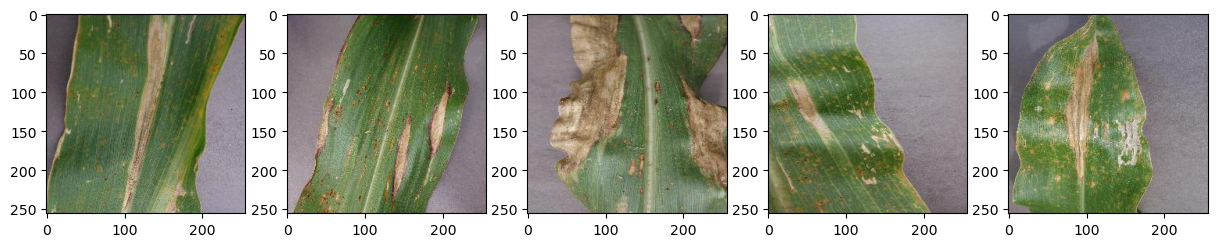

In [9]:
display_image('Blight')

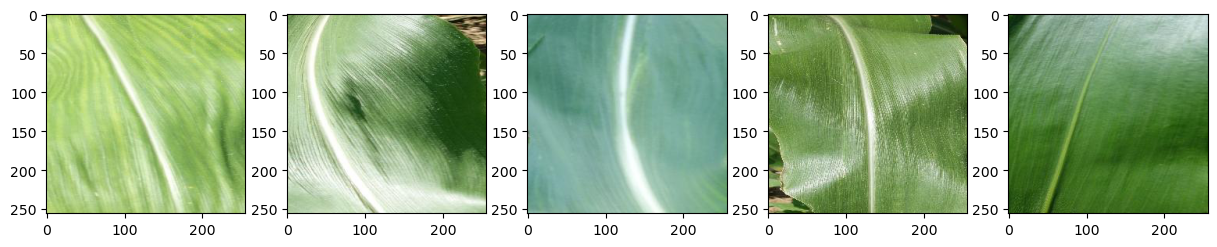

In [10]:
display_image('Healthy')

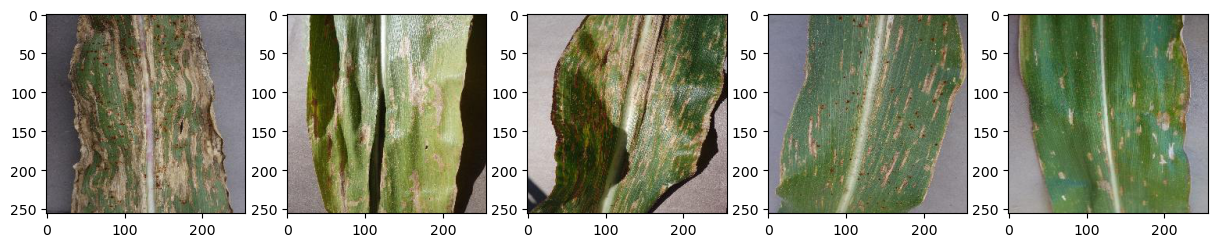

In [11]:
display_image('Gray_Leaf_Spot')

In [12]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

## Preprocessing Image

In [13]:
data_corn = tf.keras.preprocessing.image_dataset_from_directory(
    destination_dir,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2882 files belonging to 3 classes.


In [14]:
class_names = data_corn.class_names
class_names

['Blight', 'Gray_Leaf_Spot', 'Healthy']

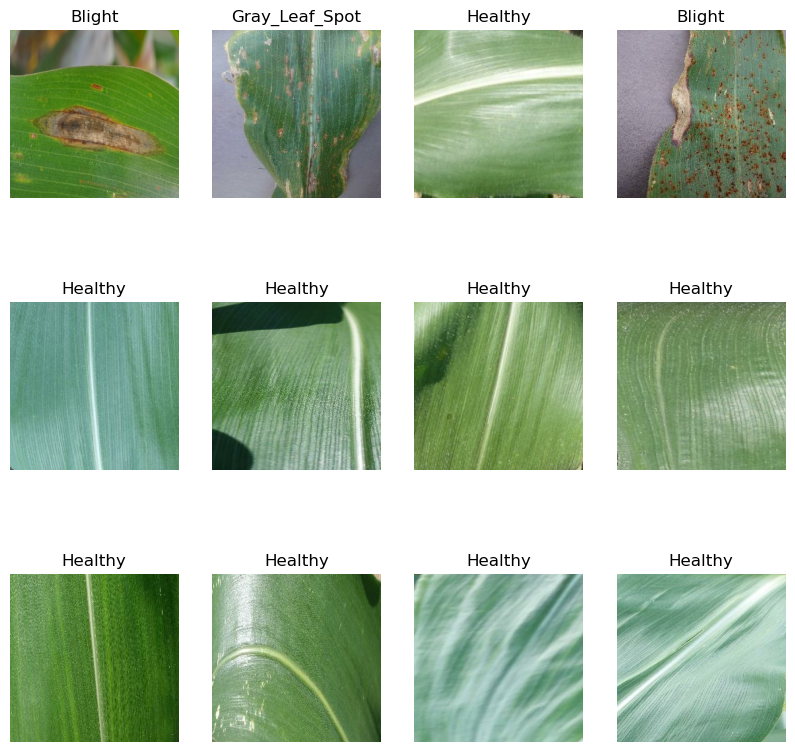

In [15]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in data_corn.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

## Splitt Dataset

In [16]:
len(data_corn)

91

In [17]:
train_size = 0.8
len(data_corn)*train_size

72.8

In [18]:
train_size = 0.8
len(data_corn)*train_size

72.8

In [19]:
test_ds = data_corn.skip(72)
len(test_ds)

19

In [20]:
val_size=0.1
len(data_corn)*val_size

9.1

In [21]:
val_ds = test_ds.take(9)
len(val_ds)

9

In [22]:
test_ds = test_ds.skip(9)
len(test_ds)

10

In [23]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [24]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(data_corn)

In [25]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Model Building

## Creating a Layer for Resizing and Normalization

In [26]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [27]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [28]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [29]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [30]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [31]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
72/72 [==============================] - 127s 2s/step - loss: 0.8340 - accuracy: 0.5976 - val_loss: 0.4848 - val_accuracy: 0.7847
Epoch 2/50
72/72 [==============================] - 113s 2s/step - loss: 0.4382 - accuracy: 0.7823 - val_loss: 0.4305 - val_accuracy: 0.7882
Epoch 3/50
72/72 [==============================] - 111s 2s/step - loss: 0.4161 - accuracy: 0.8039 - val_loss: 0.3837 - val_accuracy: 0.8056
Epoch 4/50
72/72 [==============================] - 113s 2s/step - loss: 0.4104 - accuracy: 0.7955 - val_loss: 0.3656 - val_accuracy: 0.7917
Epoch 5/50
72/72 [==============================] - 113s 2s/step - loss: 0.3547 - accuracy: 0.8166 - val_loss: 0.3509 - val_accuracy: 0.8160
Epoch 6/50
72/72 [==============================] - 113s 2s/step - loss: 0.4990 - accuracy: 0.7691 - val_loss: 0.4085 - val_accuracy: 0.8021
Epoch 7/50
72/72 [==============================] - 111s 2s/step - loss: 0.3622 - accuracy: 0.8201 - val_loss: 0.3966 - val_accuracy: 0.8021
Epoch 8/50
72

In [32]:
scores = model.evaluate(test_ds)

10/10 [==============================] - 10s 368ms/step - loss: 0.1213 - accuracy: 0.9594


## Data visualization with Loss data and Accuracy data

In [33]:
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

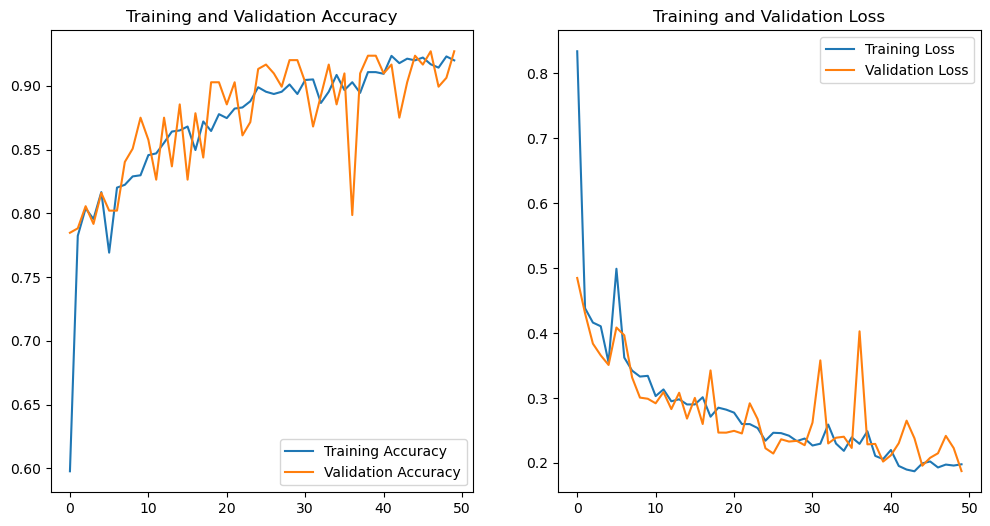

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), accuracy, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
model.save("CornDetection.h5")